# Приоритизация гипотез. Анализ результата А/В-теста

Аналитики крупного интернет-магазина и отдел маркетинга подготовили список гипотез для увеличения выручки.

Цель проекта - приоритизировать гипотезы, проанализировать результаты A/B-теста.


План проекта:
- [Часть 1. Приоритизация гипотез](#0)
- [Применение фреймворка ICE для приоритизации гипотез](#1)
- [Применение фреймворка RICE для приоритизации гипотез](#2)
- [Объясниние измнения приоритизации гипотез](#3)


- [Часть 2. Анализ A/B-теста](#4)
- [Построение графика кумулятивной выручки по группам](#5)
- [Построение графика кумулятивного среднего чека по группам](#6)
- [Построение графика относительного изменения кумулятивного среднего чека группы B к группе A](#7)
- [Построение графика кумулятивной конверсии по группам](#8)
- [Построение графика относительного изменения кумулятивной конверсии группы B к группе A](#9)
- [Построение точечного графика количества заказов по пользователям](#10)
- [Построение точечного графика стоимостей заказов](#12)
- [Подсчет статистической значимости различий в конверсии между группами по «сырым» данным](#14)
- [Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#15)
- [Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным](#16)
- [Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#17)
- [Решение по результатам теста и его объяснение](#18)

<a id='0'></a>

# Часть 1. Приоритизация гипотез

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('...') #открытие файла с гипотезами и параметрами
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Описание данных:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<a id='1'></a>

## Фреймворк ICE для приоритизации гипотез

In [3]:
data['ICE'] = ((data['Impact'] * data['Confidence']) / data['Efforts']).round(decimals = 2) #применение фреймворка ICE
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку наиболее приоритетные гипотезы 8 - "Запустить акцию, дающую скидку на товар в день рождения", 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

<a id='2'></a>

## Фреймворк RICE для приоритизации гипотез

In [4]:
data['RICE'] = ((data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']).round(decimals = 2) #применение фреймворка RICE
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку наиболее приоритетные гипотезы 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 

<a id='3'></a>

In [5]:
data[['Hypothesis', 'ICE','RICE']].sort_values(by='RICE', ascending=False) #общая таблица с приоритезацией гипотез

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


Применение фреймворков ICE и RICE для приоритерзации гипотез показывает различные результаты.
Для ICE на первые места вышли гипотезы 8 - "Запустить акцию, дающую скидку на товар в день рождения",  - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Для RICE на первом месте с существенным отрывом гипотеза 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" из-за 10 баллов параметра Reach - у гипотезы самый большой охват пользователей.

Для тестирования целесообразно выбрать гипотезу 7, т.к. по RICE у нее отрыв практически в два раза от остальных гипотез, по ICE она также находится в топ-3.

<a id='4'></a>

# Часть 2. Анализ A/B-теста

## Подготовка данных

In [6]:
orders = pd.read_csv('...') #откртие таблицы с заказами
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Описание данных:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [7]:
orders.info() #просмотр информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.duplicated().sum() #проверка наличия дубликатов

0

In [9]:
orders['date'] = pd.to_datetime(orders['date']).dt.date #изменение типа данных

В таблице нет пропусков и дубликатов. Заменен тип данных в столбце date.

In [10]:
visitors = pd.read_csv('...') #открытие таблицы с визитами
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info() #просмотр информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.duplicated().sum() #проверка наличия дубликатов

0

In [13]:
visitors['date'] = pd.to_datetime(visitors['date']).dt.date #измнение типа данных

В таблице нет пропусков и дубликатов. Заменен тип данных в столбце date.

In [14]:
visitors['group'].unique() #просмотр количества групп в тесте

array(['A', 'B'], dtype=object)

In [15]:
orders['group'].unique() #просмотр количества групп в тесте

array(['B', 'A'], dtype=object)

In [16]:
print(visitors['date'].min()) #временной интервал теста
print(visitors['date'].max())

2019-08-01
2019-08-31


In [17]:
print(orders['date'].min()) #временной интервал теста
print(orders['date'].max())

2019-08-01
2019-08-31


In [18]:
orders.groupby('group')['visitorId'].nunique() #просмотр количества пользователей в каждoй группе

group
A    503
B    586
Name: visitorId, dtype: int64

In [19]:
users_a = orders.query('group == "A"')['visitorId'] #список visitorId группы А
users_a = users_a.unique().tolist()

In [20]:
users_b = orders.query('group == "B"')['visitorId']#список visitorId группы В
users_b = users_b.unique().tolist()

In [21]:
users = users_a + users_b 
users = pd.DataFrame({'Id':users}) #таблица с пользователями
users = users.groupby('Id')['Id'].agg(['count']).sort_values(by = 'count', ascending=False) #подсчет количества каждого Id
len(users.query('count > 1')) #количество Id больше одного

58

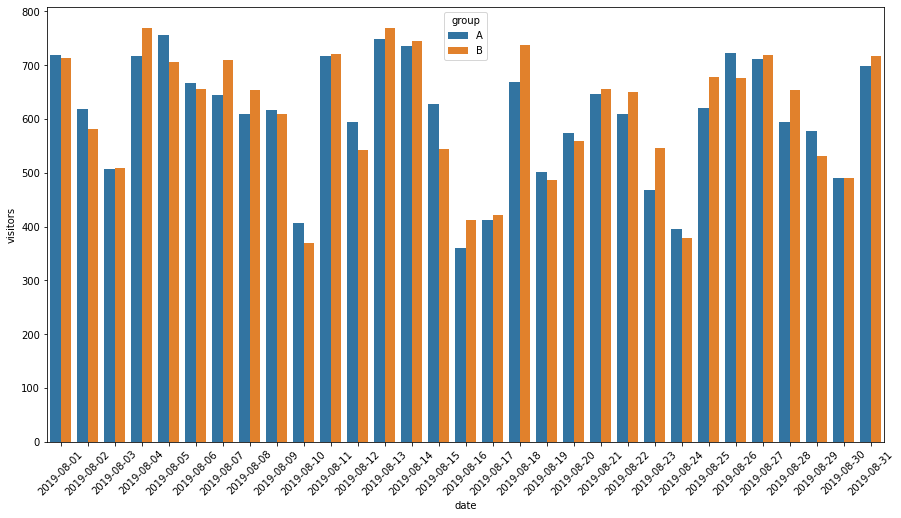

In [22]:
plt.figure(figsize=(15,8)) #динамика посещений по дням
sns.barplot(x='date', y='visitors', hue='group', data=visitors) 
plt.xticks(rotation=45)
None

Всего в тесте две группы - А и В. В группе А 503 пользователя, в группе В - 586 пользователей. Однако обнаружено 58 пользователей, которые входят в обе группы.

Временные рамки теста: с 1 по 31 августа 2019 года.

Динамика визитов по дням относительно равномерна - провалы количества посещений и их пики приходятся на одни и те же даты.

<a id='5'></a>

## График кумулятивной выручки по группам

In [23]:
#подготовка таблиц для графика
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [24]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


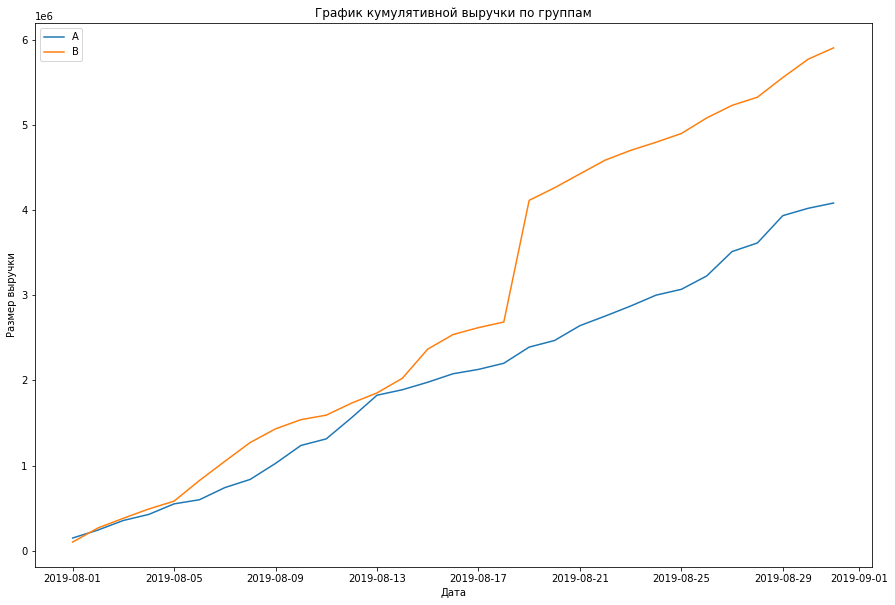

In [25]:
# фильтр таблиц
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#построение графика
plt.figure(figsize=(15, 10))
plt.title('График кумулятивной выручки по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')


plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Размер выручки')
plt.legend() 
None

В середине теста выручка группы B резко выросла, возможно были аномально большие заказы. Далее выручка идет без скачков - практически параллельно для двух групп.

В целом в течение всего теста выручка растет.

<a id='6'></a>

## График кумулятивного среднего чека по группам

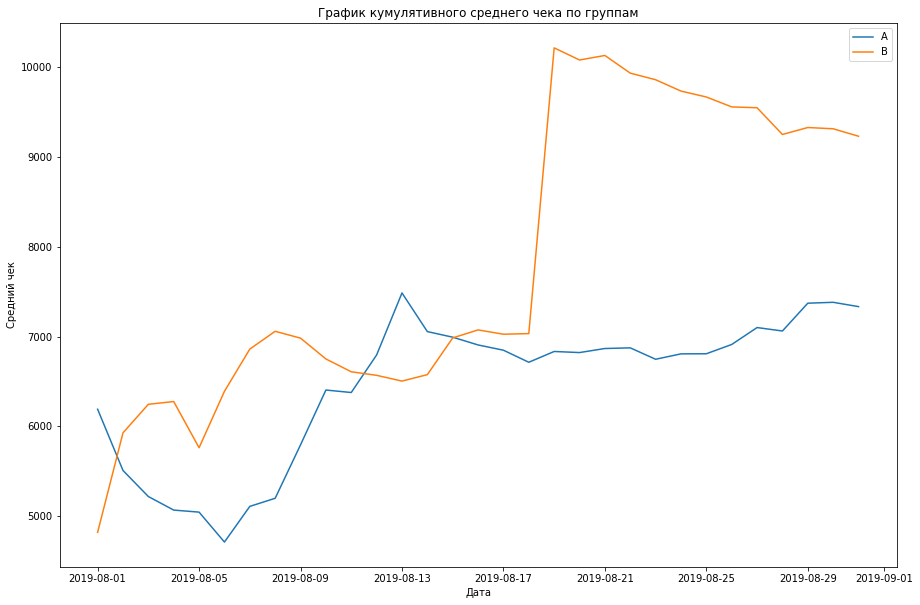

In [26]:
#графики по среднему чеку
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
None

Также виден выброс в середине теста для группы В. Группа А в начале тестирования имела низкий средний чек, затем показатели выровнялись, однако, группа В выигрывает за счет аномального заказа.

Значения среднего чека для группы В постепенно снижаются.

<a id='7'></a>

## График относительного изменения кумулятивного среднего чека

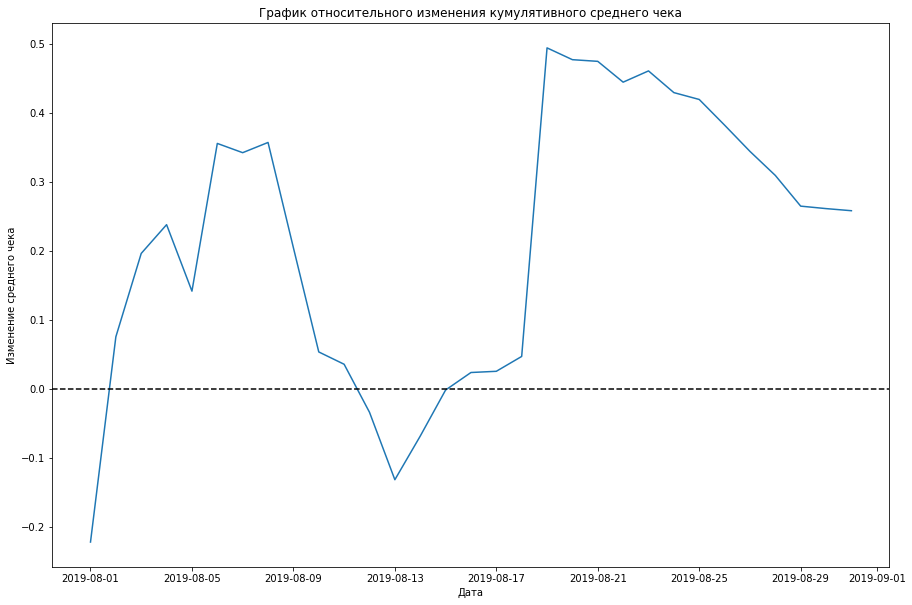

In [27]:
#подготовка таблицы, построение графика
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.axhline(y=0, color='black', linestyle='--')
None

Различия в среднем чеке значительно менялись в несколько дат.

Группа А имела преимущество 13 августа, затем значения группы B резко выросли, что вряд ли связано с тестируемой гипотезой.

Возможно, был крупный заказ, который был бы совершен вне зависимости от нахождения пользователя в той или иной группе.

<a id='8'></a>

## График кумулятивной конверсии по группам

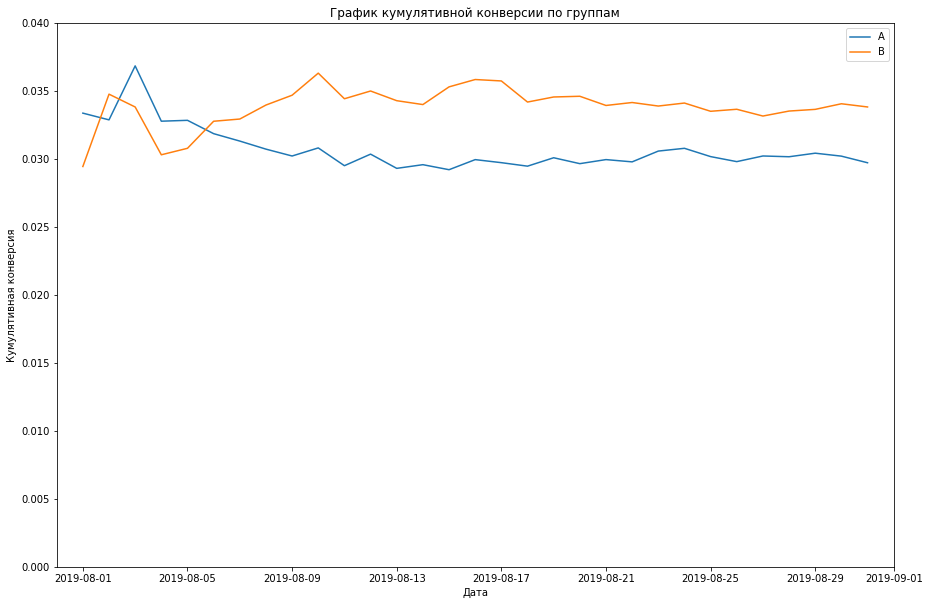

In [28]:
#подготовка данных, построение графика
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15, 10))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.legend()

#определение масштаба
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0, 0.04])
None

В самом начале теста группа А имела большую конверсию и пиковое значение на 0.037, которого группа B так и не достигла за время теста. Однако уже через несколько дней конверсия группа В превысила конверсию группы A.

Колебания конверсии продолжаются, однако в небольшом диапазоне - во второй половине теста данные стабилизировались.

<a id='9'></a>

## График относительного изменения кумулятивной конверсии группы B к группе A. 

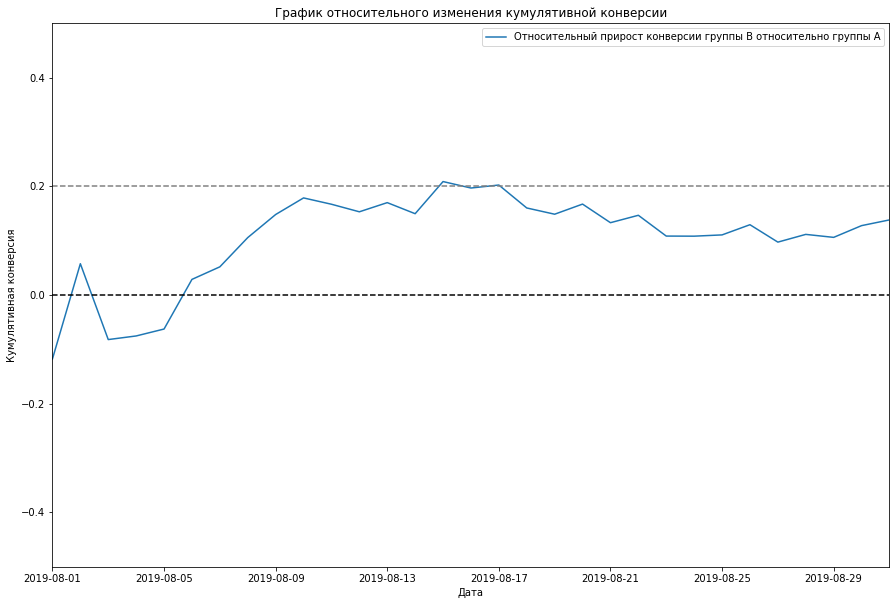

In [29]:
#подготовка данных, построение графика
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
None

Группа В с 6 дня теста показывает прирост конверсии относительно группы А. Прирост достиг 20%, затем начал снижение. К последней дате он составляет около 16%, к пиковым значениям больше не возвращался.

<a id='10'></a>

## Точечный график количества заказов по пользователям

In [30]:
#подготовка таблицы
orders_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_users.columns = ['userId', 'orders']

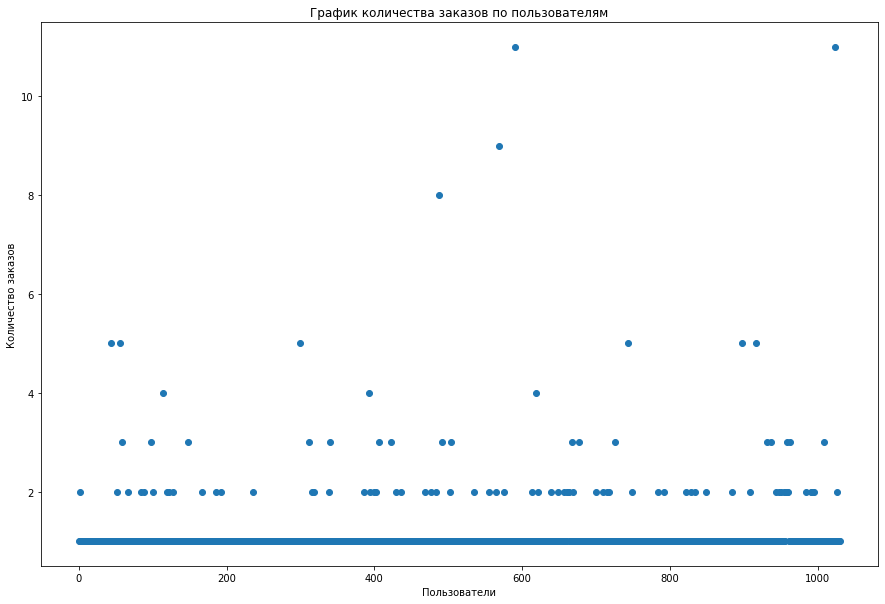

In [31]:
#построение графика
x_values = pd.Series(range(0, len(orders_users)))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_users['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
None

В основном пользователи совершают по одному заказу, также много пользователей с двумя заказами. Больше трех заказов - уже редкость.

<a id='11'></a>

In [32]:
np.percentile(orders_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше двух заказов. Не более 1% пользователей совершали более 4 заказов.
Граница аномальных показателей - более 4 заказов.

<a id='12'></a>

## Точечный график стоимостей заказов

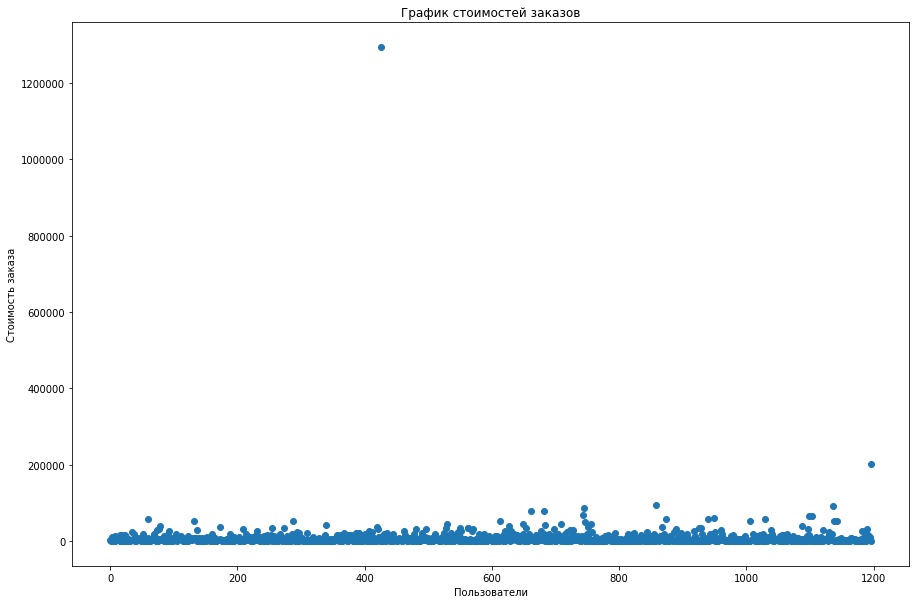

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 10))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
None

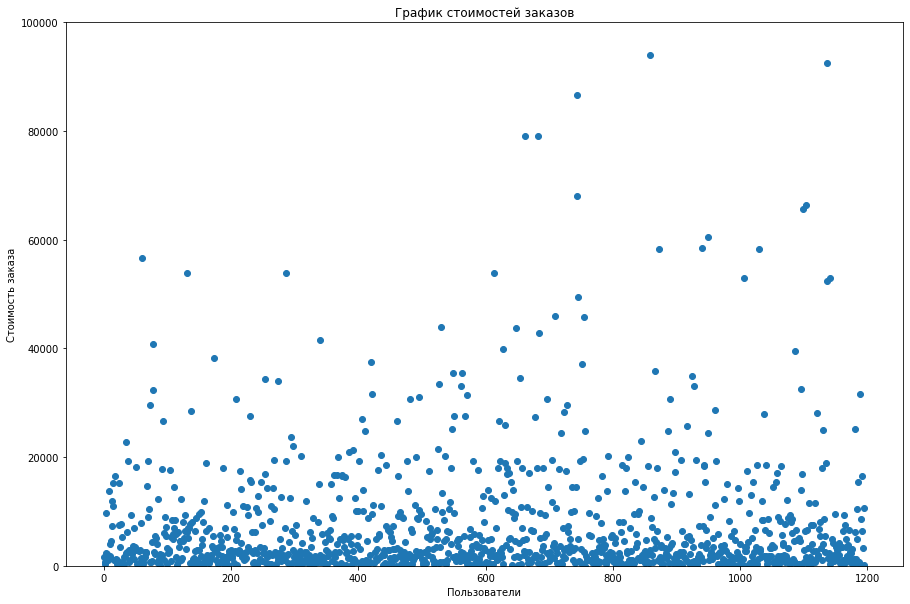

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 10))
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
None

Большинство заказов в диапазоне до 20000, есть отдельные выбросы более 200000 и более 120000. 

<a id='13'></a>

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей совершали заказ дороже 28000. Не более 1% пользователей совершали заказ более, чем на 58233.2
Граница аномальных заказов - дороже 58233.2.

<a id='14'></a>

## Статистическая значимость различий в конверсии между группами по «сырым» данным

Нулевая гипотеза: различий в конверсии между группами нет. 

Альтернативная гипотеза: различия в конверсии между группами есть.

Для проверки гипотезы будет использоваться критерий Манна-Уитни.

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print("p-value {0:.5f}".format(p_value))
if p_value > alpha:
    print('Нулевая гипотеза не может быть отвергнута')
else:
    print('Нулевая гипотеза может быть отвергнута')
print("Относительное различие конверсии между группами {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              20           148579              20   
1  2019-08-02              19            93822              23   
2  2019-08-03              24           112473              16   
3  2019-08-04              15            70825              16   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  20               148579   
1           165531                  39               242401   
2           114248                  63               354874   
3           108571                  78               425699   
4            92428                 103               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  20               101217               719   
1                  43               266748               619   
2                  59           

P-value меньше 0.05 - нулевая гипотеза о том, что статистически значимых различий в конверсии между группами нет, может быть отвергнута.

Относительный прирост конверсии группы В к группе А - 13.8%

<a id='15'></a>

## Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [37]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value {0:.3f}'.format(p_value))

if p_value > alpha:
    print('Нулевая гипотеза не может быть отвергнута')
else:
    print('Нулевая гипотеза может быть отвергнута')
print('Относительное различие среднего чека {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value 0.729
Нулевая гипотеза не может быть отвергнута
Относительное различие среднего чека 0.259


P-value больше 0.05 - нулевая гипотеза не отвергается, различий в среднем чеке между группами нет.
Однако средний чек группы В выше среднего чека группы А на 25.9% - эти различия были получены случайно.

<a id='16'></a>

## Статистическая значимость различий в конверсии между группами по «очищенным» данным

Очистка данных: в очищенных данных оставим пользователей, которые совершили не более четырех заказов и заказы которых не дороже 58233.2.

In [38]:
#создание таблицы с аномальными пользователями
abnormal_orders = 4
abnormal_revenue = 58233.2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormal_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > abnormal_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5)) #просмотр объединенной таблицы
print(abnormalUsers.shape[0]) #просмотр количества пользователей

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Аномальных пользователей 15 человек.

Нулевая гипотеза: различий в конверсии между группами нет. 

Альтернативная гипотеза: различия в конверсии между группами есть.

Для проверки гипотезы будет использоваться критерий Манна-Уитни.

In [39]:
#фильтрация групп теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

In [40]:
print('p-value {0:.3f}'.format(p_value))
if p_value > alpha:
    print('Нулевая гипотеза не может быть отвергнута')
else:
    print('Нулевая гипотеза может быть отвергнута')
print('Относительное различие конверсии между группами {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.014
Нулевая гипотеза может быть отвергнута
Относительное различие конверсии между группами 0.153


По очищенным данным P-value еще уменьшился до 0.014 (по сырым - 0.016). Нулевая гипотеза о том, что статистически значимых различий в конверсии между группами нет, может быть отвергнута.

Относительный прирост конверсии группы В к группе А по очищенным даным 15,3% (по сырым - 13.8%).

Если улучшение показателей, но незначительное.


<a id='17'></a>

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print('p-value {0:.3f}'.format(p_value))

if p_value > alpha:
    print('Нулевая гипотеза не может быть отвергнута')
else:
    print('Нулевая гипотеза может быть отвергнута')
print(
    'Относительное различие среднего чека {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.851
Нулевая гипотеза не может быть отвергнута
Относительное различие среднего чека -0.006


По очищенным данным p-value стал больше, что дает больше еще оснований не отвергать нулевую гипотезу, различий в среднем чеке нет.

Относительное различие среднего чека кардинально изменилось - по очищенным данным у группы В нет преимуществ перед группой А, более того, у группы А средний чек больше на 0.6%.

Таким образом, есть статистическое различие между конверсиями групп, группа В показывает прирост конверсии и по сырым, и по очищенным данным.
Однако статистически значимого различия в среднем чеке нет, по сырым данным различие в среднем чеке было в 25.9%, что было вкладом аномальных пользователей. После очистки группа А показывает чуть больший средний чек.


<a id='18'></a>

## Решение по результатам теста

Тест неоходимо остановить, зафиксировав победу группы В - несмотря на то, что статистической разницы в средних чеках не обнаружено, конверсия пользователей из группы В оказалась выше, чем конверсия пользователей из группы А.